# Linear Grgression 1D: Training One Parameter

## Table and Contents

1. Make Some Data
2. Create the Model and Cost Function(Total loss)
3. Train the model

In [1]:
import torch
import matplotlib.pyplot as plt

In [18]:
# The class for plotting

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

## 1. Make Some Data

In [5]:
# Create the f(x) with a slope of -3
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

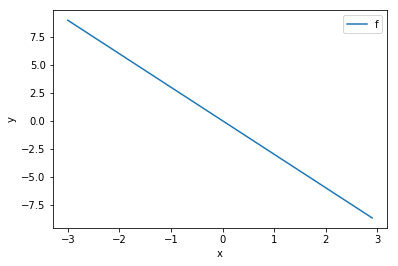

In [6]:
# Plot the line with blue

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [9]:
# Add some noise to f(x) and save it in Y
Y = f + 0.1 * torch.randn(X.size())

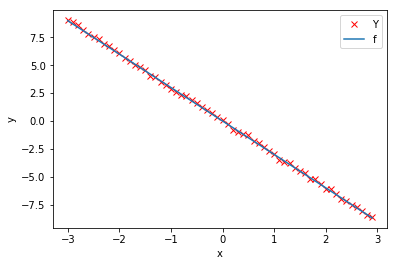

In [10]:
# Plot the data points

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## 2. Create the model and Cost Function(Total loss)

In [11]:
# Create forward function for evaluate the result
def forward(x):
    return w * x

In [13]:
# Create the MSE function for evaluate the result
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [14]:
# Create Learning Rate and empty list to record the loss for each iteration

lr = 0.1
LOSS = []

Now, we create a model parameter by setting the argument <code>requires_grad</code> to <code> True</code> because the system must learn it

In [17]:
w = torch.tensor(-10.0, requires_grad = True)

Create a <code>plot_diagram</code> object to visualize the data space and the parameter space for each iteration during training:

In [19]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)


## 3. Train the model

In [23]:
# Define a function for train the model
def train_model(iter):
    for epoch in range(iter):
        # make the prediction
        Yhat = forward(X)
        
        # calculate the iteration
        loss = criterion(Yhat, Y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        LOSS.append(loss.item())
        
        # backward pass: calculate gradient of the loss with respect to all learnable parameters
        loss.backward()
        
        # update parameters
        w.data -= lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

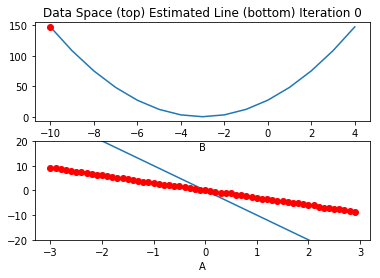

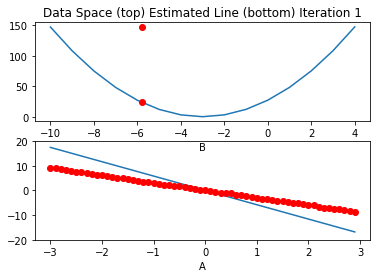

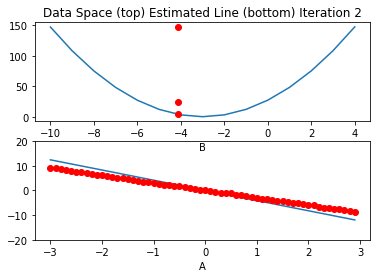

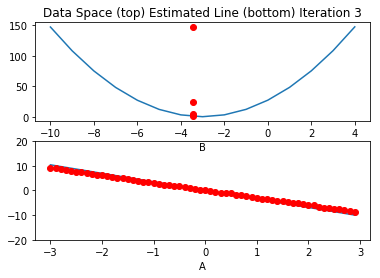

<Figure size 432x288 with 0 Axes>

In [24]:
# Give 4 iterations for training the model
train_model(4)

Text(24.0, 0.5, 'Cost')

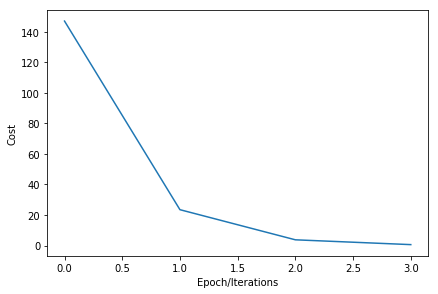

In [28]:
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")